In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_train shape (10000,)


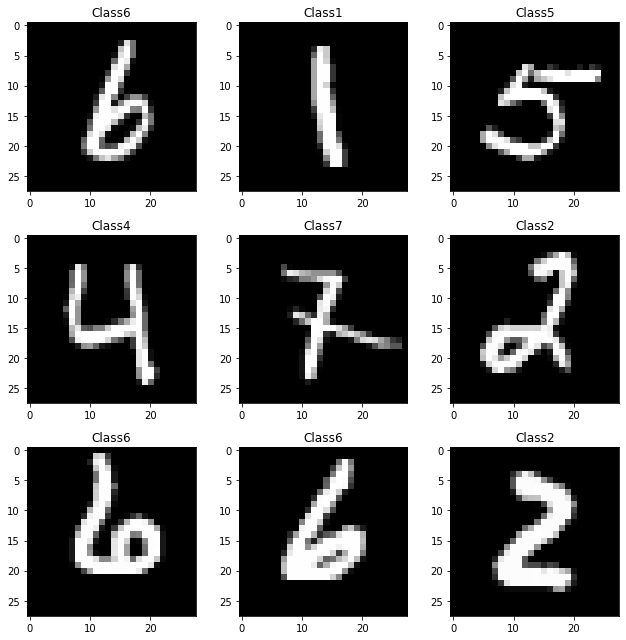

In [8]:
plt.rcParams['figure.figsize']=(9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num=random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation = 'none')
    plt.title('Class{}'.format(y_train[num]))
    
plt.tight_layout()

In [17]:
def matprint(mat, fmt='g'):
    col_maxes = [max([len(('{:'+fmt+'}').format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="")
        print("")
        


In [18]:
matprint(x_train[num])

0000000  0  0  0  0  0  0  0  0  0  0  0  0  0  00000000
0000000  0  0  0  0  0  0  0  0  0  0  0  0  0  00000000
0000000  0  0  0  0  0  0  0  0  0  0  0  0  0  00000000
0000000  0  0  0  0  0  0  0  0  0  0  0  0  0  00000000
0000000  0  0  0 45132242195 70  0  0  0  0  0  00000000
0000000  0  0  0 85252252252248145 70  8  0  0  00000000
0000000  0  0  0 85252252252253252252188128  9  00000000
0000000  0  0  0 28229252252253252252252252140  00000000
0000000  0  0  0  0 62181192195252252252252232 340000000
0000000  0  0  0  0  0  0  0  3 712252522522521390000000
0000000  0  0  0  0  0  0  0  0  0157252252252 700000000
0000000  0  0  0  0  0  0  0  5109239252252252 480000000
0000000  0  0  0  0  0  0  0117252252252252 77  50000000
0000000  0  0  0  0  0110178253252252252136  3  00000000
0000000  0  0  0  5162253253255253252195  0  0  00000000
0000000  0  0  7101252252252252216 93  0  0  0  00000000
0000000  0  0147252252252252149  0  0  0  0  0  00000000
0000000  0 64233252252252148  0

In [22]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('Training matrix shape', x_train.shape)
print('Testing matrix shape', x_test.shape)


Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('Training matrix shape', x_train.shape)
print('Testing matrix shape', x_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [25]:
nb_classes = 10

y_train=np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [35]:
model = Sequential() # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
convLayer01 = Activation('relu') # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
model.add(Activation('relu')) # activation
convLayer02 = MaxPooling2D(pool_size=(2,2)) # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3))) # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
convLayer03 = Activation('relu') # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3))) # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
model.add(Activation('relu')) # activation
convLayer04 = MaxPooling2D(pool_size=(2,2)) # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten()) # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512)) # 512 FCN nodes
model.add(BatchNormalization()) # normalization
model.add(Activation('relu')) # activation

# Fully Connected Layer 6
model.add(Dropout(0.2)) # 20% dropout of randomly selected nodes
model.add(Dense(10)) # final 10 FCN nodes
model.add(Activation('softmax')) # softmax activation

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)       

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                        height_shift_range=0.08, zoom_range=0.08)
test_gen= ImageDataGenerator()

In [39]:
train_generator = gen.flow(x_train, y_train, batch_size=128)
test_generator = test_gen.flow(x_test, y_test, batch_size=128)


In [40]:
score = model.evaluate(x_test, y_test)
print('Test score', score[0])
print('Tset accuracy', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 2.3001 - accuracy: 0.0990
Test score 2.300147771835327
Tset accuracy 0.0989999994635582


In [43]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                   validation_data=test_generator, validation_steps=10000//128)

C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 26s 55ms/step - loss: 0.1330 - accuracy: 0.9586 - val_loss: 0.0659 - val_accuracy: 0.9828
Epoch 2/5
468/468 [==============================] - 27s 59ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 3/5
468/468 [==============================] - 29s 62ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0664 - val_accuracy: 0.9777
Epoch 4/5
468/468 [==============================] - 28s 60ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0202 - val_accuracy: 0.9932
Epoch 5/5
468/468 [==============================] - 26s 56ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0382 - val_accuracy: 0.9879


In [44]:
score = model.evaluate(x_test, y_test)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])


313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9879
Test score:  0.038112424314022064
Test accuracy:  0.9879000186920166


In [52]:
from keras import backend as K

# choose any image to want by specifying the index
img = x_test[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer

def visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])

def convout1_f(x):
# The [0] is to disable the training phase flag
    return _convout1_f([0] + [x])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))

# Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

IndentationError: unexpected indent (2142977450.py, line 23)

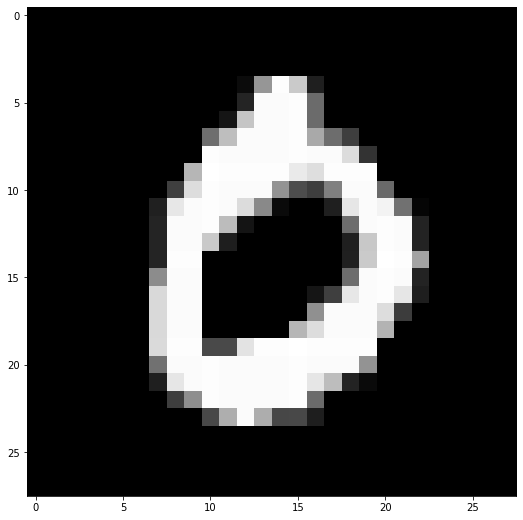

In [51]:
plt.figure()
plt.imshow(x_test[3].reshape(28,28), cmap='gray', interpolation='none')